https://www.youtube.com/@AI_INFO_29

In [129]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

In [130]:
# Function to generate and plot the data
def generate_regression_data(N, noise):
    # Generate regression data with a linear relationship
    X, y = make_regression(n_samples=N, n_features=1, noise=noise, random_state=0)
    return X, y

def plot_regression(N, noise):
    # Generate the data
    X, y = generate_regression_data(N, noise)
    # Create a figure
    plt.figure(figsize=(10, 4))
    # Create a scatter plot of X vs y to show the regression line relationship
    plt.scatter(X, y, c='g')
    plt.title('Regression Data Set')
    plt.xlabel('Feature 1')
    plt.ylabel('Target')
    plt.grid(True)
    # Show the plot
    plt.show()

# Create interactive widgets
N_slider = widgets.IntSlider(value=100, min=50, max=250, step=25, description='N')
noise_slider = widgets.FloatSlider(value=10, min=0, max=50, step=5, description='Noise')

# Use interact to create an interactive plot
interact(plot_regression, N=N_slider, noise=noise_slider)

# Extract dataset for future use
N_value = 125  # Number of samples
noise_value = 30  # Noise level
X, y = generate_regression_data(N=N_value, noise=noise_value)


interactive(children=(IntSlider(value=100, description='N', max=250, min=50, step=25), FloatSlider(value=10.0,…

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0,
                                                    test_size=5)
X_train.shape, X_test.shape

((120, 1), (5, 1))

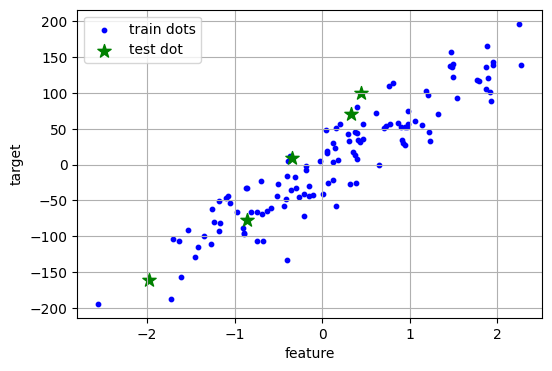

In [132]:
plt.figure(figsize=(6, 4))
#idx = 0
#test_dot = X_test[idx]
plt.scatter(X_train, y_train, c='b', marker='o', s=10, label='train dots')
plt.grid()
plt.scatter(X_test, y_test, c='g', marker='*', s=100, label='test dot')
#plt.scatter(X_test[idx, 0], y_test[idx], c='g', marker='*', s=100, label='test dot')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend();

<ipython-input-133-293fe201e9d8>:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x, 1/(x))


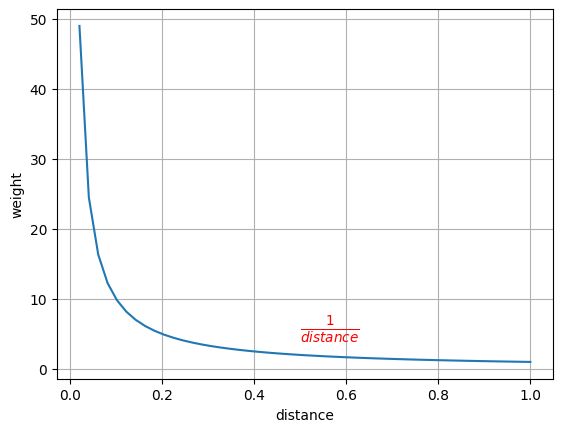

In [133]:
x = np.linspace(0, 1, 50)
plt.plot(x, 1/(x))
plt.ylabel('weight')
plt.xlabel('distance');
# Add the formula to the plot
plt.text(0.5, 5, r'$\frac{1}{distance}$', fontsize=14, color='red')  # Position and style

# Show plot
plt.grid(True)
plt.show()

Using a weight - one divided by distance is not an ideal solution due to the problem of division by zero when the distance between a test point and a training point becomes zero.

In [134]:
def weight_add(dists):
    weights = np.zeros(dists.shape)

    for i in range(dists.shape[1]):
        weights[:, i] = 1/(i+1)

    return weights

In [135]:
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [136]:
np.arange(1,30,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [137]:
parameters = {'n_neighbors':np.arange(3,15,1),
              'weights':['uniform', 'distance',weight_add],
              'metric':["minkowski",'euclidean','manhattan','chebyshev']}

#n_iter_search = 20

kNN_search = RandomizedSearchCV(estimator = KNeighborsRegressor(),
                                verbose = 3,
                          param_distributions=parameters ,
                          cv=ShuffleSplit(n_splits=5, random_state=42),
                          #n_iter = n_iter_search
                          )


In [138]:

kNN_search.fit(X_train, y_train)

kNNbest=kNN_search.best_estimator_

kNNbest.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END metric=manhattan, n_neighbors=14, weights=distance;, score=0.766 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=14, weights=distance;, score=0.753 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=14, weights=distance;, score=0.747 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=14, weights=distance;, score=0.880 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=14, weights=distance;, score=0.905 total time=   0.0s
[CV 1/5] END metric=minkowski, n_neighbors=14, weights=<function weight_add at 0x7c30d8486320>;, score=0.756 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=14, weights=<function weight_add at 0x7c30d8486320>;, score=0.812 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=14, weights=<function weight_add at 0x7c30d8486320>;, score=0.739 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=14, weights=<function weigh

In [139]:

kNN_search.best_estimator_

KNeighborsRegressor(n_neighbors=14,
                    weights=<function weight_add at 0x7c30d8486320>)

In [140]:
y_predict=kNN_search.best_estimator_.predict(X_test)
print('R2 : %.4f' %  r2_score(y_test,y_predict,))

R2 : 0.7755


In [141]:

DF_reg=pd.DataFrame(kNN_search.cv_results_)
DF = DF_reg[['param_n_neighbors','param_weights',
             'mean_test_score', 'std_test_score', 'rank_test_score']]
cm = sns.light_palette("purple", as_cmap=True)
hl = DF.sort_values(by = 'rank_test_score').style.background_gradient(cmap=cm)
hl


,param_n_neighbors,param_weights,mean_test_score,std_test_score,rank_test_score
1,14,,0.829060,0.077657,1
6,7,,0.821242,0.085980,2
2,5,uniform,0.816258,0.078914,3
0,14,distance,0.810301,0.068095,4
5,9,uniform,0.809231,0.084606,5
9,10,uniform,0.807943,0.097404,6
4,12,distance,0.805735,0.072420,7
3,7,distance,0.804345,0.076411,8
8,7,distance,0.804345,0.076411,8
7,10,distance,0.804136,0.078477,10
